# Decision Tree classifier

In [164]:
import pandas as pd
zooData=pd.read_csv("zoo.csv")

In [165]:
zooData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [166]:
zooData.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [167]:
feature_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']
X = zooData[feature_names]
y= zooData['class_type']

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=.2,test_size=0.8)

In [169]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(X_train,y_train)

In [170]:
# import warnings
# import sklearn.exceptions
# warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred= clf.predict(X_test)

In [171]:
print("accuracy of the model: ",clf.score(X_test,y_test))
print("\n confusion matrix: \n",confusion_matrix(y_test,pred))
print("\nclassification report\n")
print(classification_report(y_test,pred))

accuracy of the model:  0.8765432098765432

 confusion matrix: 
 [[31  0  0  0  0  0  1]
 [ 0 15  0  0  0  0  0]
 [ 1  0  0  2  1  1  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  7  0]
 [ 1  0  0  0  0  3  4]]

classification report

              precision    recall  f1-score   support

           1       0.94      0.97      0.95        32
           2       1.00      1.00      1.00        15
           3       0.00      0.00      0.00         5
           4       0.86      1.00      0.92        12
           5       0.67      1.00      0.80         2
           6       0.64      1.00      0.78         7
           7       0.80      0.50      0.62         8

    accuracy                           0.88        81
   macro avg       0.70      0.78      0.72        81
weighted avg       0.83      0.88      0.85        81



[Text(167.4, 195.696, 'X[2] <= 0.5\ngini = 0.71\nsamples = 20\nvalue = [9, 5, 1, 2, 1, 2]'),
 Text(125.55000000000001, 152.208, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0, 0, 0]'),
 Text(209.25, 152.208, 'X[1] <= 0.5\ngini = 0.711\nsamples = 11\nvalue = [0, 5, 1, 2, 1, 2]'),
 Text(167.4, 108.72, 'X[7] <= 0.5\ngini = 0.722\nsamples = 6\nvalue = [0, 0, 1, 2, 1, 2]'),
 Text(83.7, 65.232, 'X[5] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 1, 2]'),
 Text(41.85, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(125.55000000000001, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2]'),
 Text(251.10000000000002, 65.232, 'X[12] <= 2.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 1, 2, 0, 0]'),
 Text(209.25, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(292.95, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(251.10000000000002, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0, 0]')]

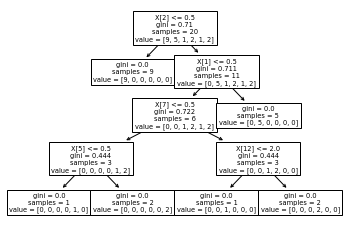

In [172]:
tree.plot_tree(clf)

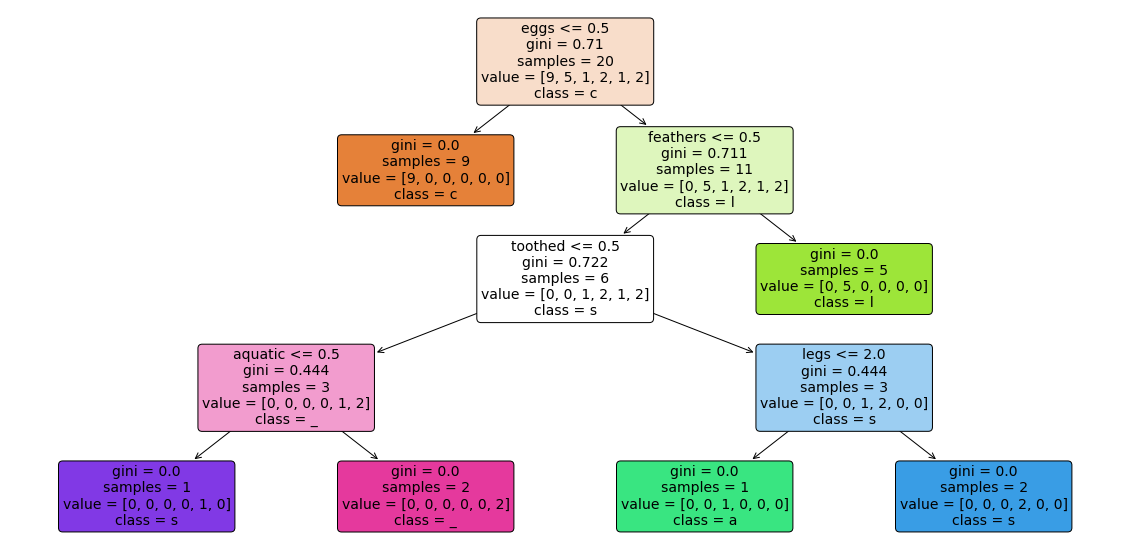

In [173]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
a = plot_tree(clf,
              feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic'],
              class_names='class_type',
              filled=True, 
              rounded=True, 
              fontsize=14)